In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime

%matplotlib inline

In [2]:
# Reading data from CSV file into a dataframe
path = 'D:/HILDA_2020/yellow_tripdata_2012.csv/yellow_tripdata_2012.csv'
df = pd.read_csv(path,nrows=100000)

In [3]:
df.head()

,vendor_name,Trip_Pickup_DateTime,Trip_Dropoff_DateTime,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,Rate_Code,store_and_forward,End_Lon,End_Lat,Payment_Type,Fare_Amt,surcharge,mta_tax,Tip_Amt,Tolls_Amt,Total_Amt
0,CMT,2012-01-10 23:55:50,2012-01-11 00:03:39,1,1.7,-73.994693,40.725031,1,N,-73.975951,40.730781,CRD,6.9,0.5,0.5,1.00,0.0,8.90
1,CMT,2012-01-11 19:18:25,2012-01-11 19:26:10,1,1.1,-73.987955,40.752947,1,N,-73.994532,40.761040,CSH,6.1,1.0,0.5,0.00,0.0,7.60
2,CMT,2012-01-11 19:19:19,2012-01-11 19:48:15,2,18.0,-73.783093,40.648550,2,N,-73.996134,40.747624,CRD,45.0,0.0,0.5,10.06,4.8,60.36
3,CMT,2012-01-11 19:19:21,2012-01-11 19:27:00,1,1.7,-73.967515,40.758454,1,N,-73.956583,40.779903,CRD,6.9,1.0,0.5,1.00,0.0,9.40
4,CMT,2012-01-11 14:38:15,2012-01-11 14:43:51,1,1.2,-74.011315,40.711449,1,N,-74.002872,40.728131,CSH,5.7,0.0,0.5,0.00,0.0,6.20


In [4]:
# checking the count and type of data in each column
df.info()
# Based on the output: Trip_Pickup_DateTime,Trip_Dropoff_DateTime need to be changed from object to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
vendor_name              100000 non-null object
Trip_Pickup_DateTime     100000 non-null object
Trip_Dropoff_DateTime    100000 non-null object
Passenger_Count          100000 non-null int64
Trip_Distance            100000 non-null float64
Start_Lon                100000 non-null float64
Start_Lat                100000 non-null float64
Rate_Code                100000 non-null int64
store_and_forward        93759 non-null object
End_Lon                  100000 non-null float64
End_Lat                  100000 non-null float64
Payment_Type             100000 non-null object
Fare_Amt                 100000 non-null float64
surcharge                100000 non-null float64
mta_tax                  100000 non-null float64
Tip_Amt                  100000 non-null float64
Tolls_Amt                100000 non-null float64
Total_Amt                100000 non-null float64
dtypes: float64(11

In [5]:
# changing the data type of Trip_Pickup_DateTime and Trip_Dropoff_DateTime
df['Trip_Pickup_DateTime']=pd.to_datetime(df['Trip_Pickup_DateTime'])
df['Trip_Dropoff_DateTime']=pd.to_datetime(df['Trip_Dropoff_DateTime'])

In [6]:
# Column wise statistical summary
#df.describe()
df.describe(include="all")

,vendor_name,Trip_Pickup_DateTime,Trip_Dropoff_DateTime,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,Rate_Code,store_and_forward,End_Lon,End_Lat,Payment_Type,Fare_Amt,surcharge,mta_tax,Tip_Amt,Tolls_Amt,Total_Amt
count,100000,100000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,93759,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
unique,2,89626,89759,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
top,CMT,2012-01-07 22:11:00,2012-01-07 22:15:00,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,CSH,NaN,NaN,NaN,NaN,NaN,NaN
freq,93765,18,24,NaN,NaN,NaN,NaN,NaN,92111,NaN,NaN,52511,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2012-01-01 00:03:02,2012-01-01 00:10:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-01-31 23:59:57,2012-02-01 00:30:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.277140,2.671444,-72.578210,39.992582,1.028340,NaN,-72.588955,39.990233,NaN,9.724234,0.340905,0.498560,1.029911,0.171677,11.765287
std,NaN,NaN,NaN,0.779512,3.067452,10.074854,5.769841,0.258065,NaN,10.031340,5.518371,NaN,7.737457,0.374089,0.026794,1.704522,0.947738,9.246106
min,NaN,NaN,NaN,0.000000,0.000000,-78.751307,-0.006083,0.000000,NaN,-78.166667,0.000000,NaN,2.500000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,NaN,NaN,NaN,1.000000,1.000000,-73.992114,40.735495,1.000000,NaN,-73.991438,40.734546,NaN,5.700000,0.000000,0.500000,0.000000,0.000000,6.950000


In [7]:
# checking statisics for non-numerical columns
non_num_cols=['vendor_name', 'Trip_Pickup_DateTime','Trip_Dropoff_DateTime','store_and_forward']
print(df[non_num_cols].count())
# Based on output: Missing values in store_and_forward column

vendor_name              100000
Trip_Pickup_DateTime     100000
Trip_Dropoff_DateTime    100000
store_and_forward         93759
dtype: int64


In [8]:
#calculate the correlation between variables of type "int64" or "float64"
df.corr()

,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,Rate_Code,End_Lon,End_Lat,Fare_Amt,surcharge,mta_tax,Tip_Amt,Tolls_Amt,Total_Amt
Passenger_Count,1.000000,0.033209,0.003696,0.003309,0.006989,0.003511,-0.002520,0.030281,0.028504,-0.006029,-0.022900,0.021945,0.024503
Trip_Distance,0.033209,1.000000,0.004761,-0.003701,0.272717,-0.000669,0.000491,0.860769,-0.025918,-0.104096,0.463829,0.554496,0.861314
Start_Lon,0.003696,0.004761,1.000000,-0.955696,0.007734,0.968941,-0.969919,0.007063,-0.004813,0.000633,0.002945,0.002250,0.006492
Start_Lat,0.003309,-0.003701,-0.955696,1.000000,-0.008056,-0.931337,0.932720,-0.006467,0.004844,-0.000499,-0.003006,-0.001344,-0.005909
Rate_Code,0.006989,0.272717,0.007734,-0.008056,1.000000,0.008731,-0.008944,0.489577,-0.073300,-0.688282,0.260175,0.305466,0.484008
End_Lon,0.003511,-0.000669,0.968941,-0.931337,0.008731,1.000000,-0.996583,0.003332,-0.004409,0.000944,0.000052,-0.001254,0.002494
End_Lat,-0.002520,0.000491,-0.969919,0.932720,-0.008944,-0.996583,1.000000,-0.003608,0.004400,-0.000403,-0.000160,0.001538,-0.002714
Fare_Amt,0.030281,0.860769,0.007063,-0.006467,0.489577,0.003332,-0.003608,1.000000,-0.051548,-0.336313,0.496554,0.539245,0.980587
surcharge,0.028504,-0.025918,-0.004813,0.004844,-0.073300,-0.004409,0.004400,-0.051548,1.000000,0.040745,-0.003952,-0.054410,-0.008865
mta_tax,-0.006029,-0.104096,0.000633,-0.000499,-0.688282,0.000944,-0.000403,-0.336313,0.040745,1.000000,-0.183093,-0.204964,-0.331654


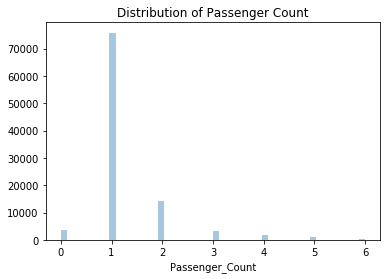

In [9]:
# distribution of passenger_count variable
sns.distplot(df['Passenger_Count'],kde=False)
plt.title('Distribution of Passenger Count')
plt.show()
# Output: Taxi is hired by mostly one person followed by 2 people. A large group of people taking a cab is rare

In [10]:
#Unique count of pickup and drop off times
df['Trip_Pickup_DateTime'].nunique()
df['Trip_Dropoff_DateTime'].nunique()
# Output: Out of 100000 data points - 89759 are unique

89759

In [11]:
# Converting date into days of week
df['pickup_day']=df['Trip_Pickup_DateTime'].dt.day_name()
df['dropoff_day']=df['Trip_Dropoff_DateTime'].dt.day_name()
# getting the count of trip by days of week
df['pickup_day'].value_counts()
# Based on output: Most trips are taken in Friday, followed by Thursday
# Least number of trips on Sunday and Monday
# Analyze: Why are there less trips on Monday????

Friday       24435
Thursday     21573
Saturday     17102
Wednesday    16209
Tuesday       7465
Sunday        6709
Monday        6507
Name: pickup_day, dtype: int64

In [12]:
# getting the count of trip by days of week
df['dropoff_day'].value_counts()
# Based on output: Most trips are taken in Friday, followed by Thursday
# Least number of trips on Sunday and Monday
# Analyze: Why are there less trips on Monday????

Friday       24344
Thursday     21574
Saturday     17249
Wednesday    16075
Tuesday       7444
Sunday        6817
Monday        6497
Name: dropoff_day, dtype: int64

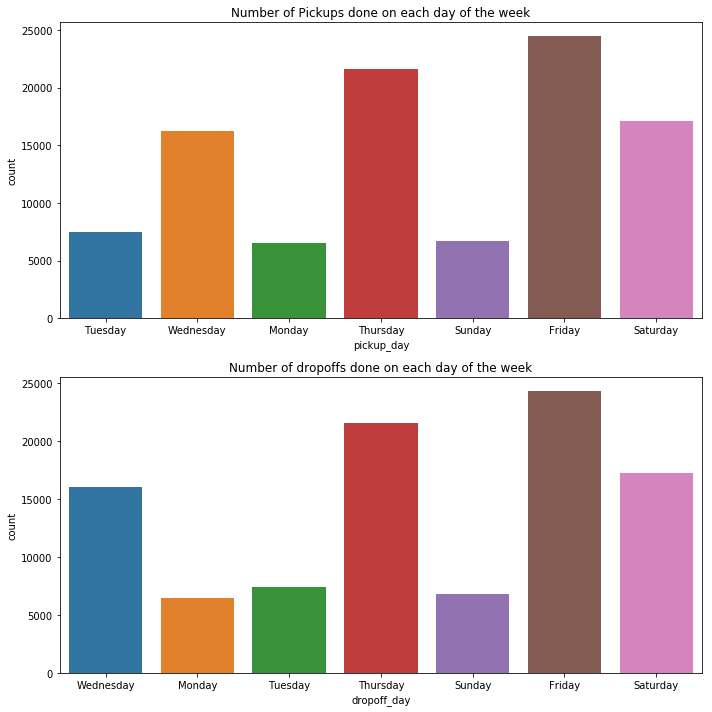

In [13]:
# distrbution of trip duration
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=df,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=df,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')
plt.tight_layout()

Text(0.5,1,'Distribution of dropoff hours')

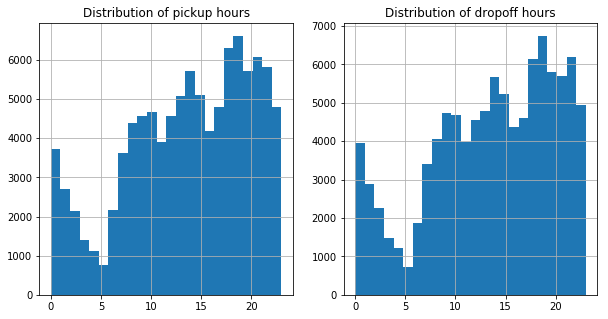

In [14]:
# distribution of pickup and drop off hours
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
df['pickup_hour']=df['Trip_Pickup_DateTime'].dt.hour
df.pickup_hour.hist(bins=24,ax=ax[0])
ax[0].set_title('Distribution of pickup hours')
df['dropoff_hour']=df['Trip_Dropoff_DateTime'].dt.hour
df.dropoff_hour.hist(bins=24,ax=ax[1])
ax[1].set_title('Distribution of dropoff hours')

Text(0.5,1,'The distribution of of the Pick Up  Duration distribution')

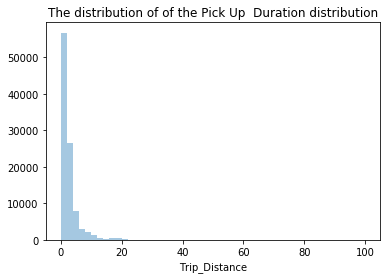

In [15]:
# Distribution of trip duration
sns.distplot(df['Trip_Distance'],kde=False)
plt.title('The distribution of of the Pick Up  Duration distribution')
#Based on output: Right skewness might indicate outliers

Text(0.5,1,'A boxplot depicting the pickup distance distribution')

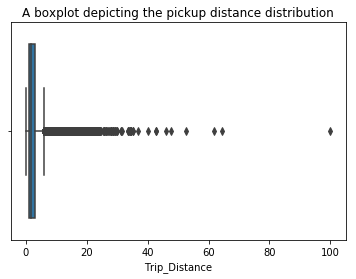

In [16]:
sns.boxplot(df['Trip_Distance'], orient='horizontal')
plt.title('A boxplot depicting the pickup distance distribution')
# Based on output: The value of 100 is an outlier.
# Most of the values are concentrated within 60 miles distance.

In [17]:
#Top 10 trip distance
print( df['Trip_Distance'].nlargest(10))

12657    100.00
7559      64.50
57226     61.69
914       52.60
52415     47.70
11267     45.90
74741     42.90
3468      42.60
23814     40.20
23082     36.90
Name: Trip_Distance, dtype: float64


In [43]:
# Calculating trip duration
df['trip_duration'] = df['Trip_Dropoff_DateTime'] - df['Trip_Pickup_DateTime']

In [25]:
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'
    
df['pickup_timezone']=df['Trip_Pickup_DateTime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
df['dropoff_timezone']=df['Trip_Dropoff_DateTime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

Text(0.5,1,'Distribution of the pickup ditribution')

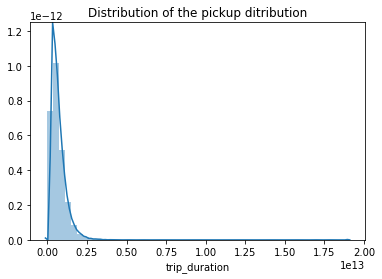

In [47]:
df['trip_duration']=pd.to_numeric(df['trip_duration'])
sns.distplot(df['trip_duration'])
plt.title('Distribution of the pickup ditribution')

Text(0.5,1,'A boxplot depicting the duration distribution')

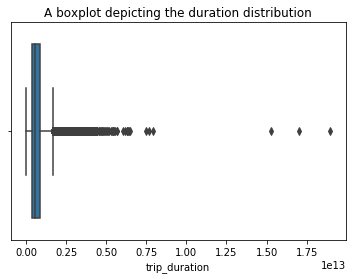

In [49]:
sns.boxplot(df['trip_duration'], orient='horizontal')
plt.title('A boxplot depicting the duration distribution')

In [44]:
# Dividing trip time into intervals
bins=np.array([0,1800,3600,5400,7200,60000])
df['duration_time']=pd.cut(df.Trip_Distance,bins,labels=["< 5", "5-10", "10-15","15-20",">20"])

Text(0.5,1,'The distribution of Pick up Longitude')

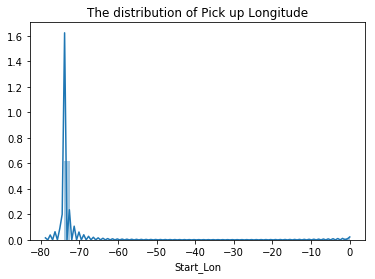

In [28]:
# Distribution of longitude
sns.distplot(df['Start_Lon'])
plt.title('The distribution of Pick up Longitude')

Text(0.5,1,'The distribution of Drop off Longitude')

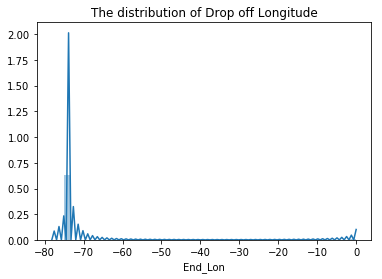

In [31]:
# Distribution of longitude
sns.distplot(df['End_Lon'])
plt.title('The distribution of Drop off Longitude')

Text(0.5,1,'The distribution of Pick up Latitude')

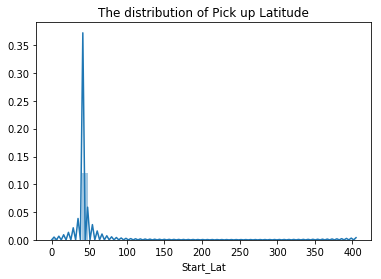

In [32]:
# Distribution of latitude
sns.distplot(df['Start_Lat'])
plt.title('The distribution of Pick up Latitude')

Text(0.5,1,'The distribution of Drop off Latitude')

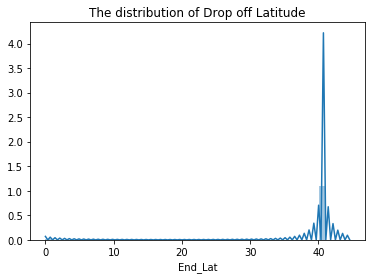

In [33]:
sns.distplot(df['End_Lat'])
plt.title('The distribution of Drop off Latitude')

Text(0.5,1,'The Average Trip Duration per Dropoff Day of the week')

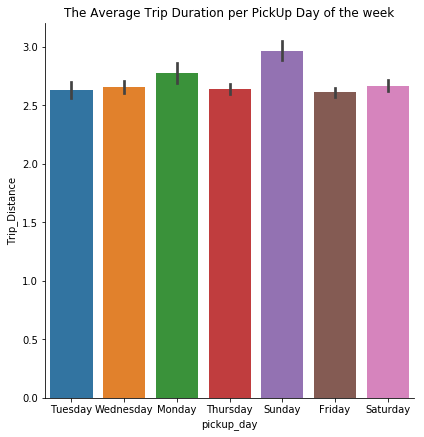

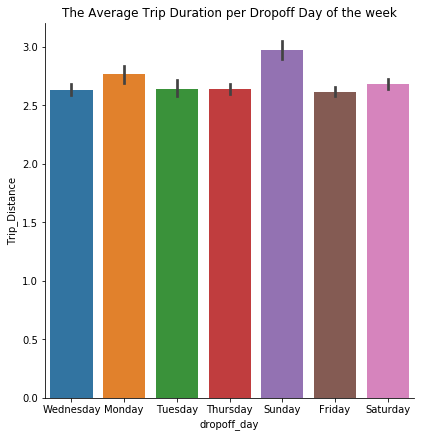

In [34]:
sns.catplot(x="pickup_day",y="Trip_Distance",kind="bar",data=df,height=6,aspect=1)
plt.title('The Average Trip Duration per PickUp Day of the week')
sns.catplot(x="dropoff_day",y="Trip_Distance",kind="bar",data=df,height=6,aspect=1)
plt.title('The Average Trip Duration per Dropoff Day of the week')

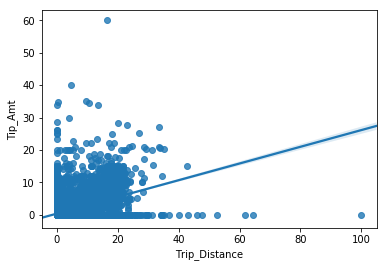

In [36]:
# Trip Distance as potential predictor variable of tip amount
sns.regplot(x="Trip_Distance", y="Tip_Amt", data=df)

count    100000.000000
mean          1.029911
std           1.704522
min           0.000000
25%           0.000000
50%           0.000000
75%           1.600000
max          60.000000
Name: Tip_Amt, dtype: float64


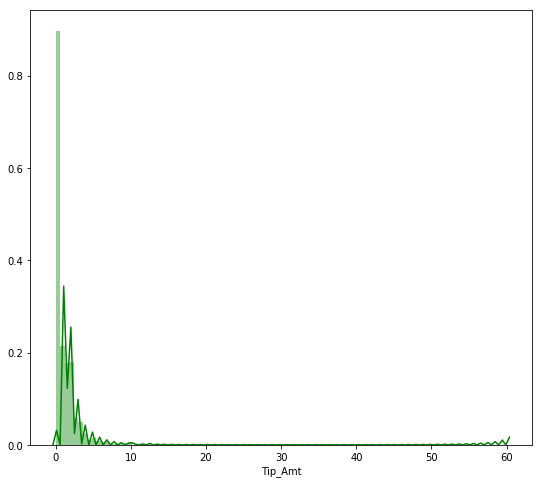

In [37]:
print(df['Tip_Amt'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Tip_Amt'], color='g', bins=100, hist_kws={'alpha': 0.4});

Text(0.5,1,'A boxplot depicting tip distribution')

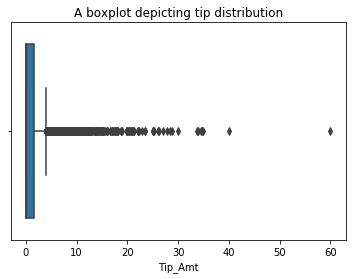

In [39]:
sns.boxplot(df['Tip_Amt'], orient='horizontal')
plt.title('A boxplot depicting tip distribution')

# To-Do
2. Get neighborhoods/borough based on latitude and longitude
3. Why are the number of trips less on Monday compared to other days.
4. Create a map of NYC determining pickup locations.